<a href="https://colab.research.google.com/github/asdsxas/LSTM-Logistic/blob/main/Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM

In [ ]:
import pandas as pd

train_labled_path = '/content/drive/MyDrive/sentiment_classification_COVID-19/data/nCoV_100k_train.labled.csv'
test_path='/content/drive/MyDrive/sentiment_classification_COVID-19/data/nCov_10k_test.csv'
df = pd.read_csv(train_labled_path, encoding='utf-8', usecols=[3,6])
df2 = pd.read_csv(test_path, encoding='utf-8', usecols=[0,3])
df = df[df['情感倾向'].isin(['0','-1','1'])]
print(df['情感倾向'].value_counts())

In [ ]:
import re
def stopwords_list(d):
    with open('/content/drive/MyDrive/sentiment_classification_COVID-19/data/'+d,'rb') as f:
        lines = f.readlines()
        result = [i.decode().strip('\n') for i in lines]
    return result

stopwords = stopwords_list('hit_stopwords.txt')
stopwords.extend(stopwords_list('cn_stopwords.txt'))
stopwords.extend(stopwords_list('baidu_stopwords.txt'))
stopwords.extend(stopwords_list('scu_stopwords.txt'))
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

df['clean_comment']=df['微博中文内容'].apply(remove_punctuation)
df2['clean_comment']=df2['微博中文内容'].apply(remove_punctuation)



In [ ]:
import jieba as jb

df['cut_comment'] = df['clean_comment'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df2['cut_comment'] = df2['clean_comment'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head(10)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.771 seconds.
DEBUG:jieba:Loading model cost 1.771 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,微博中文内容,情感倾向,clean_comment,cut_comment
0,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,0,写在年末冬初孩子流感的第五天我们仍然没有忘记热情拥抱这2020年的第一天带着一丝迷信早晨给孩...,写 年末 冬初 孩子 流感 第五天 忘记 热情 拥抱 2020 年 第一天 带 一丝 迷信 ...
1,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,-1,开年大模型累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼Luna的Krystallife,开年 模型 累到 发烧 腰疼 膝盖 疼 腿疼 胳膊 疼 脖子 疼 Luna Krystallife
2,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,1,邱晨这就是我爹爹发烧快好毕竟美好的假期拿来养病不太好假期还是要好好享受快乐爹新年快乐发烧好了...,邱晨 爹爹 发烧 快 美好 假期 拿来 养病 不太好 假期 好好 享受 快乐 爹 新年快乐 ...
3,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,1,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的,新年 第一天 感冒 发烧 太衰 我要 想着 明天
4,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,1,问我们意念里有坏的想法了天神就会给记下来那如果有好的想法也会被记下来吗答那当然了有坏的想法天...,问 意念 里 坏 想法 天神 记下来 想法 记下来 答 坏 想法 天神 会记 头上 三尺 神...
5,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,-1,发高烧反反复复眼睛都快睁不开了今天室友带我去看还在发烧中建议我输液我拒绝了给我打针你今天吃东...,发高烧 反反复复 眼睛 快 睁不开 室友 带我去 发烧 中 建议 输液 拒绝 打针 吃 东西...
6,明天考试今天发烧跨年给我跨坏了？？2兰州·兰州交通大学?,-1,明天考试今天发烧跨年给我跨坏了2兰州兰州交通大学,明天 考试 发烧 跨年 跨坏 兰州 兰州 交通 大学
7,#元旦快乐##枇杷手法小结#每个娃都是有故事的娃。每个大人也是有故事的大人。小枇杷有茶有手法...,0,元旦快乐枇杷手法小结每个娃都是有故事的娃每个大人也是有故事的大人小枇杷有茶有手法静待每个有需...,元旦 快乐 枇杷 手法 小结 娃 故事 娃 大人 故事 大人 枇杷 茶 手法 静待 需求 大...
8,我真的服了xkh昨天vv去和她说自己不舒服，描述了症状她说啊你这不是感冒没有发烧没事的晚上一...,-1,我真的服了xkh昨天vv去和她说自己不舒服描述了症状她说啊你这不是感冒没有发烧没事的晚上一回...,真的 服 xkh 昨天 vv 说 舒服 描述 症状 说 感冒 发烧 没事 晚上 一回 寝 发...
9,新年第一天，为自己鼓掌??????发烧了也要来看线下演出！因为热爱，所以才会克服困难线上演出...,1,新年第一天为自己鼓掌发烧了也要来看线下演出因为热爱所以才会克服困难线上演出太炸了爱呼兰爱赵晓...,新年 第一天 鼓掌 发烧 线下 演出 热爱 克服困难 线上 演出 太炸 爱 呼兰 爱 赵晓卉...


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20542 (\N{CJK UNIFIED IDEOGRAPH-503E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24863 

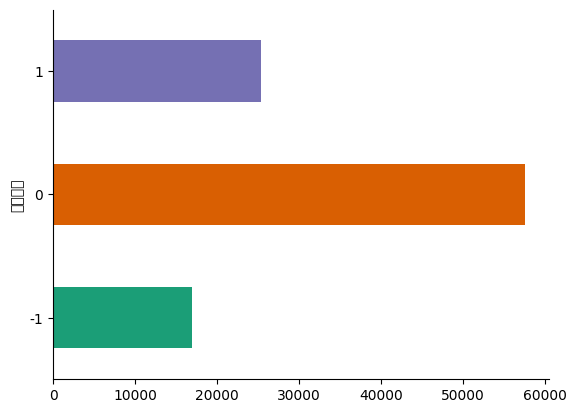

In [ ]:
# @title 情感倾向

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('情感倾向').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: 使用 DataFrame“df”:

df.head()


,微博中文内容,clean_comment
0,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,写在年末冬初孩子流感的第五天我们仍然没有忘记热情拥抱这2020年的第一天带着一丝迷信早晨给孩...
1,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,开年大模型累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼Luna的Krystallife
2,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,邱晨这就是我爹爹发烧快好毕竟美好的假期拿来养病不太好假期还是要好好享受快乐爹新年快乐发烧好了...
3,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的
4,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,问我们意念里有坏的想法了天神就会给记下来那如果有好的想法也会被记下来吗答那当然了有坏的想法天...
5,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,发高烧反反复复眼睛都快睁不开了今天室友带我去看还在发烧中建议我输液我拒绝了给我打针你今天吃东...
6,明天考试今天发烧跨年给我跨坏了？？2兰州·兰州交通大学?,明天考试今天发烧跨年给我跨坏了2兰州兰州交通大学
7,#元旦快乐##枇杷手法小结#每个娃都是有故事的娃。每个大人也是有故事的大人。小枇杷有茶有手法...,元旦快乐枇杷手法小结每个娃都是有故事的娃每个大人也是有故事的大人小枇杷有茶有手法静待每个有需...
8,我真的服了xkh昨天vv去和她说自己不舒服，描述了症状她说啊你这不是感冒没有发烧没事的晚上一...,我真的服了xkh昨天vv去和她说自己不舒服描述了症状她说啊你这不是感冒没有发烧没事的晚上一回...
9,新年第一天，为自己鼓掌??????发烧了也要来看线下演出！因为热爱，所以才会克服困难线上演出...,新年第一天为自己鼓掌发烧了也要来看线下演出因为热爱所以才会克服困难线上演出太炸了爱呼兰爱赵晓...


In [ ]:
print(df.shape)

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS = 90000
MAX_SEQUENCE_LENGTH = 60

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cut_comment'].values)

X = tokenizer.texts_to_sequences(df['cut_comment'].values)
#填充X,让X的各个列的长度统一
X = pad_sequences(X, MAX_SEQUENCE_LENGTH)

#多类标签的onehot展开
Y = pd.get_dummies(df['情感倾向']).values

#结果集
X_ans = tokenizer.texts_to_sequences(df2['cut_comment'].values)
#填充X,让X的各个列的长度统一
X_ans = pad_sequences(X_ans, MAX_SEQUENCE_LENGTH)


#拆分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.01, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X.max())
print(X)

(98913, 60) (98913, 3)
(1000, 60) (1000, 3)
89999
[[    0     0     0 ...     6     5     4]
 [    0     0     0 ...  1356 46196 79433]
 [    0     0     0 ...  6621  6621 30660]
 ...
 [    0     0     0 ...     7     9   780]
 [    0     0     0 ... 46063   581  3328]
 [    0     0     0 ...   538  7078    19]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
EMBEDDING_DIM = 256


In [ ]:
#submit4-5 sigmoid softmax
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])) # 嵌入层将维数降到128
model.add(Bidirectional(LSTM(64))) # 双向LSTM层
model.add(Dropout(0.4)) # 随机失活
model.add(Dense(3,activation='softmax')) # 稠密层 将情感分类0或1
model.compile('adam','categorical_crossentropy',metrics=['accuracy']) # 二元交叉熵

epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [ ]:
pred = model.predict(X_ans)
pred_label = pred.argmax(axis=1) - 1
#for i in df2['微博中文内容']:
    #pred_label.append(predict(i))

#print("预测的分类标签为:",pred_label)


dict={"测试数据id":df2['微博id'].values.tolist(),'情感极性':pred_label.tolist()}
#output_list = [df2['微博id'].values.tolist(),pred_label.tolist()]
output = pd.DataFrame(dict)
output.to_csv("./submit5.csv",sep=',',index=False)


313/313 [==============================] - 2s 4ms/step


LogisticRegression

In [ ]:
import pandas as pd

train_labled_path = '/content/drive/MyDrive/sentiment_classification_COVID-19/data/nCoV_100k_train.labled.csv'
test_path='/content/drive/MyDrive/sentiment_classification_COVID-19/data/nCov_10k_test.csv'
df = pd.read_csv(train_labled_path, encoding='utf-8', usecols=[3,6])
df2 = pd.read_csv(test_path, encoding='utf-8', usecols=[0,3])
df = df[df['情感倾向'].isin(['0','-1','1'])]
print(df['情感倾向'].value_counts())

import jieba
df['微博中文内容']=df['微博中文内容'].map(str)
df['cuted']=df['微博中文内容'].map(lambda x:' '.join(jieba.cut(x)))
df2['微博中文内容']=df2['微博中文内容'].map(str)
df2['cuted']=df2['微博中文内容'].map(lambda x:' '.join(jieba.cut(x)))

print(df['cuted'][1])

# 输入和输出
X = df['cuted']
y = df['情感倾向']
x_ans = df2['cuted']

from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# 查看训练集
X_train.shape



from sklearn.feature_extraction.text import CountVectorizer

# 变换器
vect = CountVectorizer()

vect.fit(X_train)

# 词表数量
print(len(vect.vocabulary_))
# 打印词表
#print(vect.vocabulary_)

#words_matrix = pd.DataFrame(vect.transform(X).toarray(),columns=vect.get_feature_names())

#words_matrix.head()


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


def stopwords_list(d):
    with open('/content/drive/MyDrive/sentiment_classification_COVID-19/data/'+d,'rb') as f:
        lines = f.readlines()
        result = [i.decode().strip('\n') for i in lines]
    return result

stopwords = stopwords_list('hit_stopwords.txt')
stopwords.extend(stopwords_list('cn_stopwords.txt'))
stopwords.extend(stopwords_list('baidu_stopwords.txt'))
stopwords.extend(stopwords_list('scu_stopwords.txt'))

print(stopwords[10:100])

vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=stopwords,
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b')

vect.fit(X_train)


# 训练模型
lr=LogisticRegression()
lr.fit(vect.transform(X_train), y_train)

print('测试集准确率：{:.3f}'.format(lr.score(vect.transform(X_test), y_test)))


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('tiv', TfidfVectorizer(max_df=0.8,min_df=3)),
                      ('gbc', GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=540,
                                                         min_samples_split=1200,
                                                         min_samples_leaf=10,
                                                         max_depth=17,
                                                         #max_features='sqrt',
                                                         subsample=1,
                                                         random_state=10))])
#param_test5= {'gbc__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
#gsearch1=GridSearchCV(estimator=pipe, param_grid=param_test5, scoring='f1_macro',iid=False,cv=5)
#gsearch1.fit(X_train, y_train)
pipe.fit(X_train, y_train)
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro')
print('平均交叉验证Macro-F1：{:.3f}'.format(np.mean(scores)))


#print('{}:{}'.format(gsearch1.cv_results_['params'],gsearch1.cv_results_['rank_test_score']),'\n',gsearch1.best_params_, gsearch1.best_score_)


vectorizer = pipe.named_steps['tiv']
# 找到每个特征中最大值
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 获取特征名称
feature_names = np.array(vectorizer.get_feature_names())

print("tfidf较低的特征：\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print()
print("tfidf较高的特征：\n{}".format( feature_names[sorted_by_tfidf[-20:]]))


from sklearn import metrics

# 预测值
y_pred = pipe.predict(X_test)

print('测试集准确率：{:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('测试集准确率：{:.3f}'.format(pipe.score(X_test, y_test)))

metrics.confusion_matrix(y_test, y_pred)

print(y_pred)

print(pd.value_counts(y_pred))

y_ans = pipe.predict(x_ans)


y_ans = pipe.predict(x_ans)
dict={"测试数据id":df2['微博id'].values.tolist(),'情感极性':y_ans.tolist()}
output_list = [df2['微博id'].values.tolist(),y_ans.tolist()]
output = pd.DataFrame(dict)
output.to_csv("submit7.csv",sep=',',index=False)


print(output_list)




情感倾向
0     57619
1     25392
-1    16902
Name: count, dtype: int64


<ipython-input-17-a251259ae316>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['微博中文内容']=df['微博中文内容'].map(str)


开年 大 模型 … 累到 以为 自己 发烧 了 腰疼 膝盖 疼 腿疼 胳膊 疼 脖子 疼 # Luna 的 Krystallife # ?
143038
['*', '一一', '~~~~', '’', '. ', '『', '.一', './', '-- ', '』', '＝″', '【', '［＊］', '｝＞', '［⑤］］', '［①Ｄ］', 'ｃ］', 'ｎｇ昉', '＊', '//', '［', '］', '［②ｅ］', '［②ｇ］', '＝｛', '}', '，也 ', '‘', 'Ａ', '［①⑥］', '［②Ｂ］ ', '［①ａ］', '［④ａ］', '［①③］', '［③ｈ］', '③］', '１． ', '－－ ', '［②ｂ］', '’‘ ', '××× ', '［①⑧］', '０：２ ', '＝［', '［⑤ｂ］', '［②ｃ］ ', '［④ｂ］', '［②③］', '［③ａ］', '［④ｃ］', '［①⑤］', '［①⑦］', '［①ｇ］', '∈［ ', '［①⑨］', '［①④］', '［①ｃ］', '［②ｆ］', '［②⑧］', '［②①］', '［①Ｃ］', '［③ｃ］', '［③ｇ］', '［②⑤］', '［②②］', '一.', '［①ｈ］', '.数', '［］', '［①Ｂ］', '数/', '［①ｉ］', '［③ｅ］', '［①①］', '［④ｄ］', '［④ｅ］', '［③ｂ］', '［⑤ａ］', '［①Ａ］', '［②⑧］', '［②⑦］', '［①ｄ］', '［②ｊ］', '〕〔', '］［', '://', '′∈', '［②④', '［⑤ｅ］', '１２％']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'exp', 'hadn', 'hasn', 'haven', 'isn', 'lex', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '若果', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

测试集准确率：0.719
